<a href="https://colab.research.google.com/github/Aldistwn29/ProjectDS/blob/main/Regresion_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Dive Case Sales Revuene Forcasting

In [ ]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inLine

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
advert = pd.read_csv('Advertising.csv')
advert.head()
advert.isnull().sum()
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
advert.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Filtering the data

In [ ]:
advert = advert.drop("Unnamed: 0",axis=1)

In [ ]:
advert

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA (Exploratory Data Analysis)

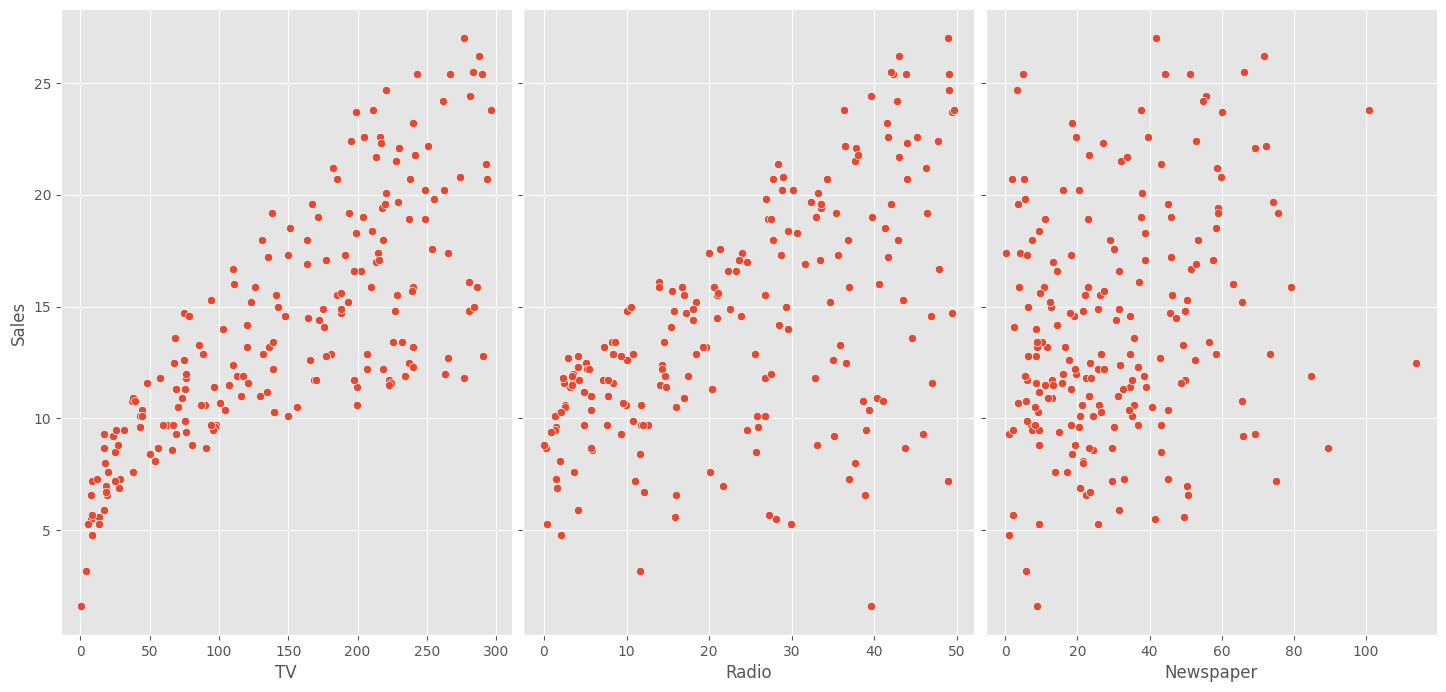

In [ ]:
# Checking relationship between Features and Response
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars='Sales', height=7, aspect=0.7)

<Axes: >

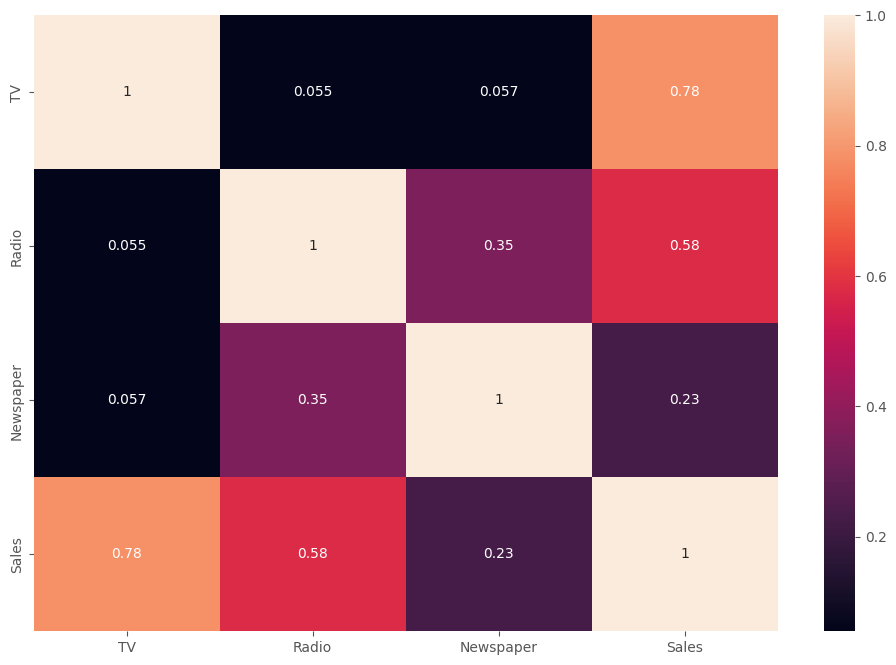

In [ ]:
# melihat korelasi berdasarkan persentasi
sns.heatmap(advert.corr(), annot=True)

Korelasi TV terhadap sales lebih tinggi 0.78 diikuti Radio dan Newspaper urutan terakhir

# Freature Selection Using Adusted R2 Score


In [ ]:
# import modul r2_score dan linear regrission
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Cheking_R_Squared between 'TV', 'newspaper'
X = advert[['TV', 'Radio', 'Newspaper']]
Y = advert.Sales

Kita sekarang akan menyesuaikam model regresi linear dengan dataset kita. kita hanya menggunakan fitur TV dan Newspaper dan kita train dan evaluasi seluruh kumpulan data. Tujuannya di sini adalah untuk melihat skor r2

In [ ]:
# we are training and evaluation on the entrie dataset
lm1 = LinearRegression().fit(X[['TV', 'Newspaper']],Y)
lm1_preds = lm1.predict(X[['TV', 'Newspaper']])

r_squared = r2_score(Y, lm1_preds)
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('adjusted R^2: ',adjusted_r_squared)

adjusted R^2:  0.6404146085307965


In [ ]:
# Checking R_squared batween 'TV', 'Radio
lm2 = LinearRegression().fit(X[['TV', 'Radio']],Y)
lm2_preds = lm2.predict(X[['TV', 'Radio']])

r_squared2 = r2_score(Y, lm2_preds)
adjusted_r_squared2 = 1 - (1-r_squared2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('adjusted R^2: ',adjusted_r_squared2)

adjusted R^2:  0.8956207038545727


In [ ]:
# Checking R_squared batween 'TV', 'Radio, 'Newspaper'
lm3 = LinearRegression().fit(X[['TV', 'Radio','Newspaper']],Y)
lm3_preds = lm3.predict(X[['TV', 'Radio', 'Newspaper']])

r_squared3 = r2_score(Y, lm3_preds)
adjusted_r_squared3 = 1 - (1-r_squared3)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('adjusted R^2: ',adjusted_r_squared3)

adjusted R^2:  0.8956373316204668


Jadi dengan menambahkan Newspaper, skor adjusted R-Squared tidak meningkat banyak. kita dapat menghapus fitur Newspaper dari model. Menjaga fitur Newspaper kemungkinan akan menyebabkan hasil yg buruk pada set tes.

# Evaluating the model

Kita akan membagi dataset kita menjadi set traning dan testing, dan kita akan menggunakan Root Mean Squered(RMSE) untuk mengevaluasi modelnya. kita akan melihat fitur Newspaper harus di simpan dalam model. mari gunakan ketiga fitur tersbut dan lihat RMSE dan R2 pada set testing.

In [ ]:
# Model Evaluation using Train/Test and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# semua fiture
X = advert[['TV', 'Radio', 'Newspaper']]
Y = advert.Sales

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm4 = LinearRegression().fit(X_train, Y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm4_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm4_preds))*(len(y)-1)/(len(y)-x.shape[1]-1))

RMSE:  1.404651423032895
adjusted R^2:  0.9143298516044154


Mari gunakan fitur TV dan Radio saja dan lihat seperti apa RMSE dan R2 kita nantinya.

In [ ]:
# TV dan Radio fiture
X = advert[['TV', 'Radio']]
Y = advert.Sales

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm5 = LinearRegression().fit(X_train, Y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm5_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm5_preds))*(len(y)-1)/(len(y)-x.shape[1]-1))

RMSE:  1.3879034699382888
adjusted R^2:  0.9163605987283329


RMSE telah berkurang dan R2 telah meningkat. ini menunjukkan bahwa model lm5 lebih baik dari model lm4. jadi fitur Newspaper, kita mendapatkan model yg lebih baik. sekarang mari kita coba lihat seperti apa RMSE dan R2 kita jika kita harus menggunakan kolom TV dan Newspaper

In [ ]:
# TV dan Newspaper fitur
X = advert[['TV', 'Newspaper']]
Y = advert.Sales

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm6 = LinearRegression().fit(X_train, Y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(Y_test, lm6_preds)))
print("adjusted R^2: ", 1-(1-r2_score(Y_test, lm6_preds))*(len(y)-1)/(len(y)-x.shape[1]-1))

RMSE:  3.352056334433862
adjusted R^2:  0.5121177593931628


# Conclusion


bahwa melalui variabel independen TV dan Radio untuk memprediksi hasil unit pejualan barang itu lebih mudah, di bandingkan dengan koran (newspaper)